## Background Project

Asuransi kesehatan adalah salah satu hal yang patut diperhatikan karena bersangkutan dengan kebutuhan perencanaan masa depan. Pengguna asuransi kesehatan diwajibkan untuk membayar besaran uang secara rutin (premi) kepada pihak perusahaan asuransi. Premi tersebut diolah oleh perusahaan asuransi untuk membayarkan tagihan kesehatan pengguna yang tertanggung. Penentuan nilai premi menjadi tantangan tersendiri bagi pihak asuransi mengingat ada banyak faktor yang dapat mempengaruhi & meningkatkan profil resiko pengguna.

Melalui project ini, dilakukan analisa variable-variabel yang memiliki hubungan dengan tagihan kesehatan yang diterima oleh setiap pengguna.

### Dataset

Dataset yang disediakan adalah data tagihan kesehatan personal. Data ini memiliki 7 variable dengan variable charges menunjukkan besaran tagihan kesehatan. Deskripsi setiap kolom dari dataset adalah sebagai berikut:

- Age : Age of primary beneficiary
- Sex : Insurance contractor gender, female, male
- BMI : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m2) using the ratio of height to weight, ideally 18.5 to 24.9
- Children : Number of children covered by health insurance / Number of dependents
- Smoker : Smoking
- Region : The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- Charges : Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###  Analisa Descriptive Statistic
Lakukan eksplorasi data dengan merangkum karakter-karakter berdasarkan data seperti mencari rata-rata dan persebaran data

1. Berapa rata-rata umur dari data tersebut?

In [4]:
mean_age = df['age'].mean()
print(mean_age)

39.20702541106129


2. Berapa rata-rata nilai BMI dari yang merokok?

In [5]:
df["smoker"] = df["smoker"].replace({"yes":1, "no":0})
print(df)

      age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [6]:
mean_bmi_smoker_yes = df[df['smoker']==1]['bmi'].mean()
print(mean_bmi_smoker_yes)

30.708448905109503


3. Apakah variansi dari data charges perokok dan non perokok sama?

In [7]:
variance_charges_smoker = df[df['smoker']==1]['charges'].var()
print(variance_charges_smoker)

133207311.20634921


In [8]:
variance_charges_noSmoker = df[df['smoker']==0]['charges'].var()
print(variance_charges_noSmoker)

35925420.49611172


*Ternyata variansi dari data charges perokok dan non perokok tidak sama*

4. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?

In [9]:
df["sex"] = df["sex"].replace({"female":1, "male":0})
print(df)

      age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
2      28    0  33.000         3       0  southeast   4449.46200
3      33    0  22.705         0       0  northwest  21984.47061
4      32    0  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0  northwest  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]


In [10]:
mean_age_female_smoker = (df[df['smoker']==1][df['sex']==1]['age']).mean()
print(round(mean_age_female_smoker, 1))

38.6


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\2314880884.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_age_female_smoker = (df[df['smoker']==1][df['sex']==1]['age']).mean()


In [11]:
mean_age_male_smoker = df[df['smoker']==1][df['sex']==0]['age'].mean()
print(round(mean_age_male_smoker, 1))

38.4


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\740482606.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_age_male_smoker = df[df['smoker']==1][df['sex']==0]['age'].mean()


*Rata-rata umur perempuan yang merokok adalah 38.6 sedangkan untuk rata-rata umur laki-laki yang merokok adalah 38.4*

5. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok atau non perokok?

In [12]:
mean_charge_smoker = df[df['smoker']==1]['charges'].mean()
print(mean_charge_smoker)

32050.23183153285


In [13]:
mean_charge_noSmoker = df[df['smoker']==0]['charges'].mean()
print(mean_charge_noSmoker)

8434.268297856199


*Rata-rata tagihan kesehatan perokok lebih tinggi dibandingkan non perokok*

6. Mana yang lebih tinggi, rata-rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

In [14]:
mean_charge_smoker_bmi = df[df['smoker']==1][df['bmi']>25]['charges'].mean()
print(mean_charge_smoker_bmi)

35116.90965694065


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\4217983051.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_charge_smoker_bmi = df[df['smoker']==1][df['bmi']>25]['charges'].mean()


In [15]:
mean_charge_noSmoker_bmi = df[df['smoker']==0][df['bmi']>25]['charges'].mean()
print(mean_charge_noSmoker_bmi)

8629.589609712148


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\2788588473.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_charge_noSmoker_bmi = df[df['smoker']==0][df['bmi']>25]['charges'].mean()


*Rata-rata tagihan kesehatan perokok yang BMI nya diatas 25 lebih tinggi dibandingkan non perokok yang BMI nya diatas 25*

7. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [16]:
max_bmi_female = df[df['sex']==1]['bmi'].max()
print(max_bmi_female)

48.07


In [17]:
max_bmi_male = df[df['sex']==0]['bmi'].max()
print(max_bmi_male)

53.13


*Seorang laki-laki memiliki BMI lebih tinggi daripada perempuan*

8. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [18]:
max_bmi_smoker = df[df['smoker']==1]['bmi'].max()
print(max_bmi_smoker)

52.58


In [19]:
max_bmi_noSmoker = df[df['smoker']==0]['bmi'].max()
print(max_bmi_noSmoker)

53.13


*Seorang non perokok memiliki BMI yang lebih tinggi daripada perokok*

###  Analisa Variabel Kategorik (PMF)
Untuk memperdalam analisa, identifikasi peluang kondisi tertentu yang berpotensi memiliki besaran tagihan kesehatan.

1. Gender mana yang memiliki tagihan paling tinggi?

In [20]:
max_charge_female = df[df['sex']==1]['charges'].max()
print(max_charge_female)

63770.42801


In [21]:
max_charge_male = df[df['sex']==0]['charges'].max()
print(max_charge_male)

62592.87309


*Perempuan memiliki tagihan paling tinggi di bandingkan laki-laki*

2. Bagaimana bentuk distribusi peluang tagihan di tiap-tiap region

In [22]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\UYUN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

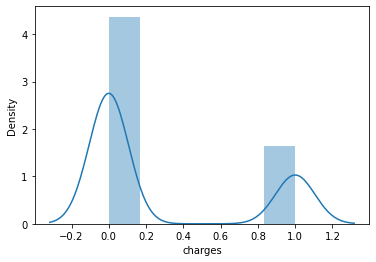

In [23]:
sns.distplot(df['region']=='southeast', axlabel='charges', kde=True)

C:\Users\UYUN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

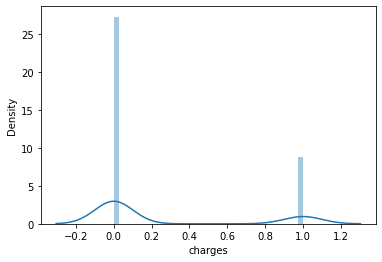

In [24]:
sns.distplot(df['region']=='southwest', axlabel='charges', kde=True)

C:\Users\UYUN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

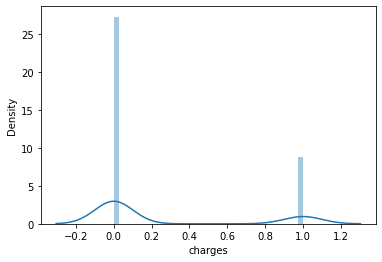

In [25]:
sns.distplot(df['region']=='northwest', axlabel='charges', kde=True)

C:\Users\UYUN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


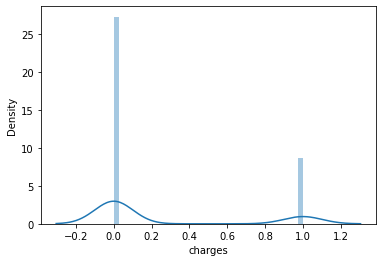

In [26]:
fig = sns.distplot(df['region']=='northeast', axlabel='charges', kde=True)

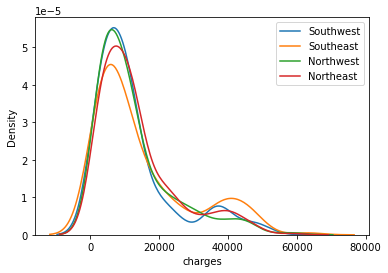

In [27]:
sns.kdeplot(df['charges'][df['region']=='southwest'], label='Southwest')
sns.kdeplot(df['charges'][df['region']=='southeast'], label='Southeast')
sns.kdeplot(df['charges'][df['region']=='northwest'], label='Northwest')
sns.kdeplot(df['charges'][df['region']=='northeast'], label='Northeast')

plt.legend()

3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [28]:
total = len(df['smoker'])
print(total)

1338


In [29]:
total_southeast = len(df[df['region']== 'southeast'])
proporsi_southeast = total_southeast/total
print(proporsi_southeast)

0.27204783258594917


In [30]:
total_southwest = len(df[df['region']== 'southwest'])
proporsi_soutwest = total_southwest/total
print(proporsi_soutwest)

0.2428998505231689


In [31]:
total_northwest = len(df[df['region']== 'northwest'])
proporsi_northwest = total_northwest/total
print(proporsi_northwest)

0.2428998505231689


In [32]:
total_northeast = len(df[df['region']== 'northeast'])
proporsi_northeast = total_northeast/total
print(proporsi_northeast)

0.242152466367713


*Region northeast, northwest, dan southwest memiliki proporsi data banyak orang yang sama sedangkan untuk proporsi southeast berbeda*

4. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [33]:
smoker = len(df[df['smoker']==1])
total_smoker = smoker/total
print(total_smoker)

0.20478325859491778


In [34]:
non_smoker = len(df[df['smoker']==0])
total_noSmoker = non_smoker/total
print(total_noSmoker)

0.7952167414050823


*Proporsi non perokok lebih tinggi dibandingkan perokok*

5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [35]:
condition_female_smoker = len(df[df['sex']==1][df['smoker']==1])
prob_female_smoker = condition_female_smoker/smoker
print(prob_female_smoker)

0.4197080291970803


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\3222038516.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_female_smoker = len(df[df['sex']==1][df['smoker']==1])


6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [36]:
condition_male_smoker = len(df[df['sex']==0][df['smoker']==1])
prob_male_smoker = condition_male_smoker/smoker
print(prob_male_smoker)

0.5802919708029197


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\3414754296.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_male_smoker = len(df[df['sex']==0][df['smoker']==1])


###  Analisa Variabel Kontinu (CFD)
Variabel dalam data yang ada tidak semuanya berbentuk kategorik, untuk memahami kemungkinan kondisi variabel bernilai kontinu terhadap tagihan kesehatan. Lakukan analisa CDF pada data.

1. Mencari kemungkinan terjadi, BMI diatas 30 mendapat tagihan kesehatan di atas 30k

In [37]:
cond_bmi_30 = len(df[df['bmi']>30])
charge_30k = len(df[df['charges']>30000])
prob_smoker_bmi_30 = charge_30k/cond_bmi_30
print(prob_smoker_bmi_30)

0.2297872340425532


2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700

In [38]:
cond_smoker_bmi = len(df[df['smoker']==1][df['bmi']>25])
charge_more = len(df[df['charges']>16700])
prob_smoker_bmi = charge_more/cond_smoker_bmi
print(prob_smoker_bmi)

1.5251141552511416


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\627711168.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cond_smoker_bmi = len(df[df['smoker']==1][df['bmi']>25])


3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok

In [39]:
condition_charges_smoker= len(df[df['charges']>16700][df['smoker']==1])
prob_charges_smoker = condition_charges_smoker/smoker
print(prob_charges_smoker)

0.927007299270073


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\650431218.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  condition_charges_smoker= len(df[df['charges']>16700][df['smoker']==1])


4. Mana yang lebih mungkin terjadi a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k


In [40]:
more_bmi_charge = len(df[df['charges']>16700][df['bmi'] > 25])
cond_more_bmicharge = more_bmi_charge/total
print(cond_more_bmicharge)

0.21150971599402094


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\3486318858.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  more_bmi_charge = len(df[df['charges']>16700][df['bmi'] > 25])


In [41]:
less_bmi_charge = len(df[df['charges']>16700][df['bmi'] < 25])
cond_less_bmicharge = less_bmi_charge/total
print(cond_less_bmicharge)

0.03811659192825112


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\3794327297.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  less_bmi_charge = len(df[df['charges']>16700][df['bmi'] < 25])


*Lebih mungkin terjadi seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k*

5. Mana yang lebih mungkin terjadi a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [42]:
print(prob_smoker_bmi)

1.5251141552511416


In [43]:
cond_noSmoker_bmi = len(df[df['smoker']==0][df['bmi']>25])
prob_more_bmi_noSmoker = charge_more/cond_noSmoker_bmi
print(prob_more_bmi_noSmoker)

0.3830275229357798


C:\Users\UYUN\AppData\Local\Temp\ipykernel_18148\3479486769.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cond_noSmoker_bmi = len(df[df['smoker']==0][df['bmi']>25])


*Lebih mungkin terjadi seorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k*

###  Analisa  Korelasi Variabel
Selanjutnya cari hubungan antara kondisi-kondisi yang ada dengan tagihan kesehatan.

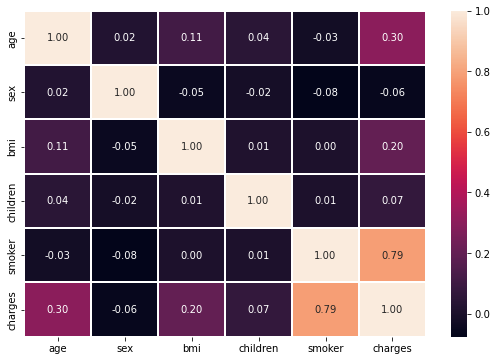

In [44]:
corr = df.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidths=1.5, fmt='.2f', ax=ax)
plt.show()

*Dari gambar di atas maka dapat disimpulkan bahwa tagihan memiliki korelasi yang baik dengan perokok, umur dan BMI. Diantara kondisi yang ada korelasi paling tinggi terjadi antara tagihan kesehatan dan perokok.*

Perokok, Umur dan BMI berkorelasi positif dengan Tagihan Kesehatan karena nilainya mendekati 1

###  Pengujian Hipotesis
Langkah terakhir, mencari apakah ada bukti statistik yang cukup terhadap klaim atau hipotesis tentang tagihan kesehatan

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

In [45]:
Ho = "Tagihan kesehatan bagi perokok dan non perokok sama"
Ha = "Tagihan kesehatan bagi perokok lebih tinggi"

stat, p = stats.ttest_ind(df[df['smoker']==1]['charges'], df[df['smoker']==0]['charges'])
print('Statistik :', stat,'dan P-value :',(p/2))

Statistik : 46.66492117272371 dan P-value : 4.135717921089551e-283


In [46]:
alpha = 0.05

In [47]:
# Pengambilan Keputusan
if p > alpha:
    print('Gagal tolak Ho, Ho yaitu', Ho) 
else:
    print('Tolak Ho, Ho yaitu', Ho)

Tolak Ho, Ho yaitu Tagihan kesehatan bagi perokok dan non perokok sama


*Dari pengujian diatas dapat disimpulkan bahwa tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok*

2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

In [48]:
Ho = "tagihan kesehatan dengan BMI diatas 25 dan dibawah 25 adalah sama" 
Ha = "tagihan kesehatan dengan BMI diatas 25 lebih tinggi" 

stat, p = stats.ttest_ind(df[df['bmi']>25]['charges'], df[df['bmi']<25]['charges'])
print('Statistik :', stat,'dan P-value :',(p/2))

Statistik : 4.305033989510502 dan P-value : 8.958227797305148e-06


In [49]:
if p > alpha:
    print('Gagal tolak Ho, Ho yaitu', Ho) 
else:
    print('Tolak Ho, Ho yaitu', Ho)

Tolak Ho, Ho yaitu tagihan kesehatan dengan BMI diatas 25 dan dibawah 25 adalah sama


*Dari pengujian diatas dapat disimpulkan bahwa tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25*

3. BMI laki-laki dan perempuan berbeda

In [50]:
Ho = "BMI laki-laki dan perempuan tidak berbeda (sama)"
Ha = "BMI laki-laki dan perempuan beda" 

stat, p  = stats.ttest_ind(df[df['sex']==0]['bmi'], df[df['sex']==1]['bmi'])
print('Statistik :', stat,'dan P-value :',(p))

Statistik : 1.696752635752224 dan P-value : 0.08997637178984932


In [51]:
if p > alpha:
    print('Gagal tolak Ho, Ho yaitu', Ho) 
else:
    print('Tolak Ho, Ho yaitu', Ho)

Gagal tolak Ho, Ho yaitu BMI laki-laki dan perempuan tidak berbeda (sama)


*Dari pengujian diatas menghasilkan gagal tolak hipotesis nol, yang berarti dapat disimpulkan bahwa BMI dari laki-laki dan perempuan tidak berbeda/sama*

4. Proporsi perokok berbeda di tiap region 

In [52]:
Ho = "proporsi perokok sama di tiap region" 
Ha = "Proporsi perokok berbeda di tiap region"

contingency= pd.crosstab(df['smoker'], df['region'], margins=True) 
contingency

region,northeast,northwest,southeast,southwest,All
smoker,,,,,
0,257,267,273,267,1064
1,67,58,91,58,274
All,324,325,364,325,1338


In [53]:
value = np.array([contingency.iloc[0][0:4].values,contingency.iloc[1][0:4].values]) 
c, p, dof, expected = stats.chi2_contingency(value)
print(p)

0.06171954839170547


In [54]:
if p > alpha:
    print('Gagal tolak Ho, Ho yaitu', Ho) 
else:
    print('Tolak Ho, Ho yaitu', Ho)

Gagal tolak Ho, Ho yaitu proporsi perokok sama di tiap region


*Dari pengujian diatas menghasilkan gagal tolak hipotesis nol, yang berarti dapat disimpulkan bahwa Proporsi perokok sama di tiap region*